In [ ]:
# Gustavo Salinas - salinasgustavon@gmail.com

In [2]:
! wget 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'


--2020-04-24 20:28:14--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolviendo covid.ourworldindata.org (covid.ourworldindata.org)... 18.230.52.212
Conectando con covid.ourworldindata.org (covid.ourworldindata.org)[18.230.52.212]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 395834 (387K) [text/csv]
Grabando a: “full_data.csv”

full_data.csv       100%[===================>] 386.56K  1.14MB/s    en 0.3s    

2020-04-24 20:28:15 (1.14 MB/s) - “full_data.csv” guardado [395834/395834]



In [25]:
#ACTUALIZAR LA DATA
import os
os.unlink('full_data.csv')

! wget 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'

--2020-04-25 18:18:39--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolviendo covid.ourworldindata.org (covid.ourworldindata.org)... 18.230.52.212
Conectando con covid.ourworldindata.org (covid.ourworldindata.org)[18.230.52.212]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 402680 (393K) [text/csv]
Grabando a: “full_data.csv”

full_data.csv       100%[===================>] 393.24K  1.03MB/s    en 0.4s    

2020-04-25 18:18:40 (1.03 MB/s) - “full_data.csv” guardado [402680/402680]



In [ ]:
#Cosas a mejorar
#   SELECCION DE FECHAS ELEGIR DE UNA LISTA Y VALIDAR Q START SEA ANTES DE END


In [1]:
#EJECUTAR ESTE BLOQUE ANTES DE CUALQUIER OTRO DEL ARCHIVO

import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams

#Leemos el archivo y lo pasamos como diccionario
file = pd.read_csv('full_data.csv')
dataFile = file.to_dict('index')

#Guardamos todos los países en un set en mayúsculas
allCountries = set()

for key in dataFile:
    allCountries.add(dataFile[key]['location'].upper())

#Revisa que un país efectivamente exista.
def countryCheck(country):
    if country in allCountries:
        return True
    else:
        return False


#Convierte un string YYYY-mm-dd a formato date de datetime
def toDate(string):
    date = datetime.datetime.strptime(string, '%Y-%m-%d')
    return date

#Plotea un diccionario
def plotDict(dict, field, format, lbl):
    x = list()
    y = list()
    for keys in dict:
        x.append(keys)
        y.append(dict[keys][field])
    plt.plot(x, y, format, label = lbl)

#Funcion para ingresar una fecha
def inputDate(typeDate):
    #Ingreso las fechas
    yr = int(input('%s\nIngrese el año: \nEjemplo: 2014.' %typeDate))
    mth = int(input('%s\nIngrese el número del mes: \nEjemplo: si desea elegir marzo debe ingresar 3, si desea elegir noviembre debe ingresar 11.' %typeDate))
    dy = int(input('%s\nIngrese el día: \nRecuerde que debe ingresar un número.' %typeDate))
    #Checkeo que sea una fecha valida y caso contrario pido volverla a ingresar
    isValid = False
    while not isValid:
        try:
            d = datetime.date(yr,mth,dy)
            isValid = True
        except:
            yr = int(input('%s\nIngresa el año correctamente: \n Ejemplo: 2014.' %typeDate))
            mth = int(input('%s\nIngrese el mes correctamente: \n Ejemplo: si desea elegir marzo debe ingresar 3, si desea elegir noviembre debe ingresar 11.' %typeDate))
            dy = int(input('%s\nIngrese el día correctamente:\nRecuerde que debe ingresar un número' %typeDate))
    return d

#Ingresar ambas fechas y validar que una la de inicio sea anterior a la de fin
def chooseDates():
    startDate = inputDate('Fecha de inicio')
    endDate = inputDate('Fecha de fin')

    while endDate <= startDate:
        startDate = inputDate('La fecha de inicio debe ser anterior a la fecha de finalización.\nFecha de inicio')
        endDate = inputDate('La fecha de inicio debe ser anterior a la fecha de finalización.\nFecha de fin')
    return startDate,endDate


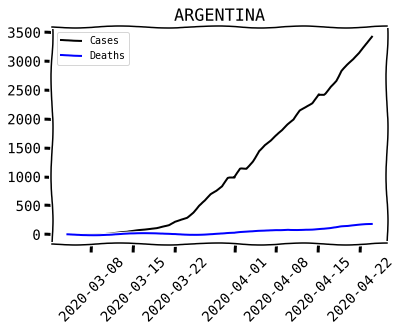

In [22]:
#Primter item

#Identificamos el país que desea el usuario
aInput1 = str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper()
while countryCheck(aInput1) == False:
    aInput1= str(input('No encontramos el país introducido. Por favor intenta de nuevo')).upper()

#Armamos un diccionario con la info del país elegido
aCountry1 = dict()
for key in dataFile:
    if dataFile[key]['location'].upper() == aInput1:
      aCountry1[toDate(dataFile[key]['date'])] = {
          'total_cases' : int(dataFile[key]['total_cases']),
          'total_deaths' : int(dataFile[key]['total_deaths'])
          }

#Ploteamos el diccionario
with plt.xkcd():
    rcParams["font.family"] = "monospace"
    plotDict(aCountry1, 'total_cases', 'k', 'Cases')
    plotDict(aCountry1, 'total_deaths', 'b', 'Deaths')
    plt.title(aInput1)



plt.legend()
plt.xticks(rotation=45)
plt.show()

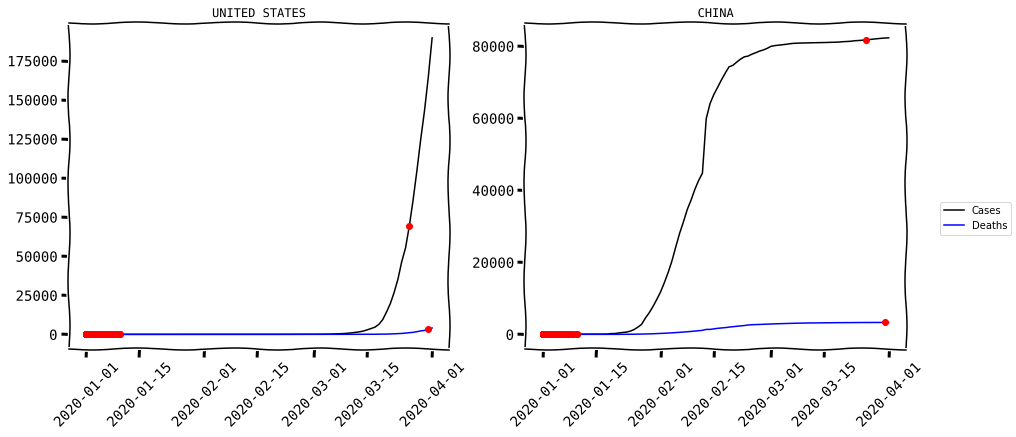

In [3]:
#Segundo item:
#   el usuario indica intervalo de tiempo
#   calcular intersecciones y marcar con un punto

#El usuario elige las fechas
startDate, endDate = chooseDates()

#Arma un diccionario con la info de cada país en el intervalo de fechas solicitado
def countryCasesDeaths(input):
    countrydict = dict()
    for key in dataFile:
        if (dataFile[key]['location'].upper() == input) and (str(startDate) <= dataFile[key]['date'] <= str(endDate)):
            countrydict[toDate(dataFile[key]['date'])] = {
            'total_cases' : int(dataFile[key]['total_cases']),
            'total_deaths' : int(dataFile[key]['total_deaths'])
             }
    return countrydict

bInput1 = str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper()
while countryCheck(bInput1) == False:
    bInput1= str(input('No encontramos el país introducido. Por favor intenta de nuevo')).upper()
bInput2 = str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper()
while countryCheck(bInput2) == False:
    bInput2= str(input('No encontramos el país introducido. Por favor intenta de nuevo')).upper()


bcountry1 = countryCasesDeaths(bInput1)
bcountry2 = countryCasesDeaths(bInput2)

#Imprimo las curvas en axes, para evitar el MatplotlibDeprecationWarning
with plt.xkcd():
    rcParams["font.family"] = "monospace"
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
    ax1.tick_params('x', rotation = 45)
    ax2.tick_params('x', rotation = 45)


def plotDict1(field, format, lbl):
    x = list()
    y = list()
    for keys in bcountry1:
        x.append(keys)
        y.append(bcountry1[keys][field])
    ax1.plot(x, y, format, label = lbl)
plotDict1('total_cases','k', 'Cases')
plotDict1('total_deaths', 'b', 'Deaths')
ax1.set_title(bInput1)
def plotDict2(field, format, lbl):
    x = list()
    y = list()
    for keys in bcountry2:
        x.append(keys)
        y.append(bcountry2[keys][field])
    ax2.plot(x, y, format, label = lbl)
plotDict2('total_cases','k', 'Cases')
plotDict2('total_deaths', 'b', 'Deaths')
ax2.set_title(bInput2)



def findJoint(country1, country2, field):
    #Armo diccionario con el país que tiene el índice más alto cada día
    leadcountry = dict()
    j = 0
    for i in country1:
        if country1[i][field] > country2[i][field]:
            leadcountry[j] = {'country' : 'country1', 'date' : i}
        elif country1[i][field] < country2[i][field]:
            leadcountry[j] = {'country' : 'country2', 'date' : i}
        else:
            leadcountry[j] = {'country' : 'tie', 'date' : i}
        j += 1
    #Armo diccionario con los puntos que coinciden
    joints = dict()
    for i in range(len(leadcountry)-1):
        if (leadcountry[i]['country'] != leadcountry[i+1]['country']) or (leadcountry[i]['country'] == 'tie'):
            joints[i] = {
                'date' : leadcountry[i]['date'],
                'value1': country1[leadcountry[i]['date']][field],
                'value2': country2[leadcountry[i]['date']][field]
            }
    #Imprime los puntos
    x = list()
    y1 = list()
    y2 = list()
    for i in joints:
        x.append(joints[i]['date'])
        y1.append(joints[i]['value1'])
        ax1.plot(x,y1, 'ro')
        y2.append(joints[i]['value2'])
        ax2.plot(x,y2, 'ro')

findJoint(bcountry1,bcountry2, 'total_cases')
findJoint(bcountry1,bcountry2, 'total_deaths')


#Agrego los labels
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')

plt.show()

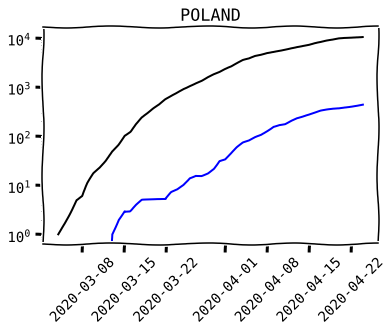

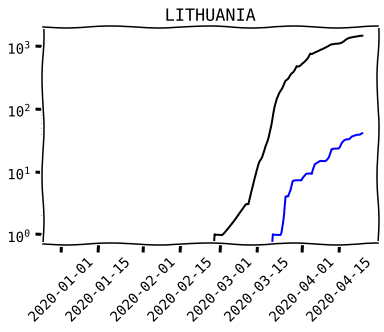

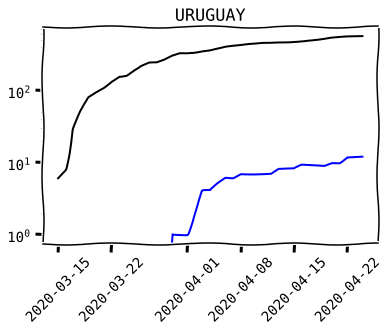

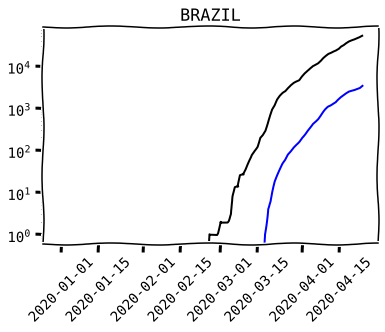

In [24]:
#Item 3

#El usuario elige las fechas
startDate, endDate = chooseDates()


#Ingreso la cantidad de países a graficar
n = input('Ingrese la cantidad de países que desea graficar:')
while n.isdigit() == False:
    n = input('La cantidad de países debe ser un número entero. \nIngrese la cantidad de países que desea graficar:')
n = int(n)

#Armo una lista con los países a graficar
countries = list()

#Se va a usar para validar que no se introduzca dos veces el mismo país en la lista
def checkForCountries(input):
    if input in auxList:
        return True
    else:
        return False

#Carga de la lista
for i in range(n):
    countries.append(str(input('Ingrese el país del que desea visualizar los contagios y fallecimientos totales:')).upper())
    #Reviso que efectivamente sea un país
    while countryCheck(countries[i]) == False:
        countries[i]= str(input('No encontramos el país introducido. Por favor intenta de nuevo')).upper()
    #Reviso que no esté repetido en la lista. No uso un set porque los necesito ordenados.
    auxList = list()
    for j in range(i):
        auxList.append(countries[j])
    while checkForCountries(countries[i]) == True:
        countries[i]= str(input('Este país ya fue registrado. Por favor ingrese otro:')).upper()

#Ploteo las listas
for i in range(n):
    #Armamos un diccionario con la info del país i
    aCountry1 = dict()
    for key in dataFile:
        if dataFile[key]['location'].upper() == countries[i]:
            aCountry1[toDate(dataFile[key]['date'])] = {
            'total_cases' : int(dataFile[key]['total_cases']),
            'total_deaths' : int(dataFile[key]['total_deaths'])
          }
    #Ploteamos el diccionario
    with plt.xkcd():
        rcParams["font.family"] = "monospace"
        plotDict(aCountry1, 'total_cases', 'k', 'Cases')
        plotDict(aCountry1, 'total_deaths', 'b', 'Deaths')
        #Defino la escala logarítmica
        plt.yscale('log')
        plt.title(countries[i])
        plt.xticks(rotation=45)
        plt.show()

In [4]:
#Item 4

#El usuario elige las fechas
startDate, endDate = chooseDates()

writer = pd.ExcelWriter('Resumen Diario.xlsx')

#recorro los dias uno por uno empezando por la fecha de inicio
readDate = startDate
while readDate <= endDate:
    #Creo un diccionario con las muestras de ese día
    today = dict()
    for key in dataFile:
        if readDate == toDate(dataFile[key]['date']):
            today[dataFile[key]['location']] = {
                'total_cases' : int(dataFile[key]['total_cases']),
                'total_deaths': int(dataFile[key]['total_deaths'])
            }
    #En una lista guardo la cantidad de casos del dia
    cases = list()
    for key in today:
        cases.append(today[key]['total_cases'])
    #Ordeno la lista
    cases.sort(reverse = True)
    #Creo un nuevo diccionario con el ingreso de elementos ordenado según el total de casos
    finalDict = dict()
    for i in range(len(cases)):
        for key in today:
            blacklist = list()
            if (today[key]['total_cases'] == cases[i]) and (key not in blacklist):
                finalDict[key] = {
                    'total_cases' : today[key]['total_cases'],
                    'total_deaths': today[key]['total_deaths']
                }
                #filtro para la próxima iteración el país que acabo de guardar
                blacklist.append(key)

    finalDataFrame = pd.DataFrame(finalDict)
    finalDataFrame.transpose().to_excel(writer, datetime.datetime.strftime(readDate, '%d %m %Y'))
    writer.save()
    #incremento el día y repito el bucle
    readDate += datetime.timedelta(days=1)


